# Charged-particle $R_{AA}$ in Pb-Pb collisions at 5.02 TeV from CMS

## 8.1 Simple parton energy loss model
 In the lecture a simplified parton energy loss model was discussed which assumed a constant fractional
energy loss $\varepsilon _\text{loss} = |\Delta p_T|/p_T = \text{const.}$ In this problem we consider the case of a constant absolute energy loss $\Delta$, i.e., the transverse momentum after the energy loss is given by $p_T' = p_T - \Delta $.

a) Write down the formula for the charged-hadron $R_{AA}(p_T)$ for a transverse momentum spectrum
described by

\begin{equation}
\frac{1}{p_T} \frac{dN}{dp_T} \propto \frac{1}{p_T^n}
\end{equation}

assuming a constant absolute energy loss.


Assuming no energy loss:

\begin{equation}
R _{AA} = \frac{dN/dp_T \ |_{A+A}}{\langle T_{AA} \rangle \ d\sigma _\text{inv} / dp_T \ |_{p+p}} = \frac{c \ / \ p_T^{n-1}}{\langle T_{AA} \rangle \ d\sigma _\text{inv} / dp_T \ |_{p+p}}=  1
\end{equation}

Considering energy loss:
\begin{equation}
    \frac{dN}{dp_T'} = \frac{dN}{dp_T}\frac{dp_T}{dp_T'} = c \cdot \frac{1}{(p_T)^{n-1}}\cdot 1 = c \cdot \frac{1}{(p_T' + \Delta)^{n-1}} = \frac{c}{p_T'^{n-1}} \left( \frac{p_T'}{p_T'+\Delta} \right)^{n-1}
\end{equation}

\begin{equation}
R_{AA} = \frac{dN/dp_T' \ |_{A+A}}{\langle T_{AA} \rangle \ d\sigma _\text{inv} / dp_T' \ |_{p+p}} = \frac{c \ / \ p_T'^{n-1}}{\langle T_{AA} \rangle \ d\sigma _\text{inv} / dp_T' \ |_{p+p}} \left( \frac{p_T'}{p_T'+\Delta} \right)^{n-1} = 1 \cdot \left( \frac{p_T'}{p_T'+\Delta} \right)^{n-1}
\end{equation}

\begin{equation}
 \implies R_{AA} = \left( \frac{p_T'}{p_T'+\Delta} \right)^{n-1}
\end{equation}


b) Determine the value $\Delta$ which describes the $R_{AA}(p_T)$ measured in central ( 0-5%) Pb-Pb collisions for $p_T$ > 25 GeV/c best.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

CMS Raa vs. pT data for 0-5% most central Pb-Pb ([arXiv:1611.01664](http://arxiv.org/abs/arXiv:1611.01664)) available on [hepdata](http://www.hepdata.net/record/ins1496050?version=1&table=Table8). Read data as comma separated values:

In [3]:
pt, Raa, RaaStatErr = np.loadtxt('HEPData-ins1496050-v1-Table_8.csv', delimiter=',', usecols=(0,3,4), unpack=True, dtype=float)

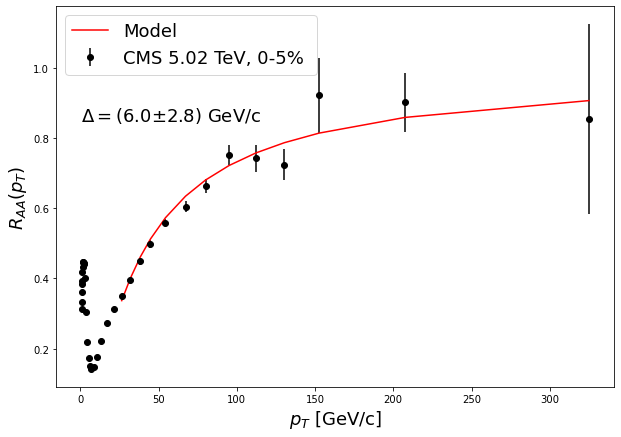

In [30]:
#Definition of R_AA
def R_AA(pt,n, Delta):
    return (pt/(pt+Delta))**(n-1)

#Fitting using only p_T < 25 GeV/c
fp = 22
used_bounds = ([6.29, 0], [6.35, 25])
ini_par = [6.3, 5]

popt, pcov = curve_fit(R_AA, pt[fp:], Raa[fp:], ini_par, sigma = RaaStatErr[fp:], absolute_sigma = True, bounds = used_bounds)

#Plot measurement
plt.figure(figsize = (10,7))
plt.xlabel('$p_T$ [GeV/c]', fontsize = 18)
plt.ylabel('$R_{AA}(p_T)$', fontsize = 18)
plt.errorbar(pt, Raa, yerr=RaaStatErr, fmt='o', color = "black", label = "CMS 5.02 TeV, 0-5% ")
# plt.xscale("log")

#Plot fitted function
plt.plot(pt[fp:], R_AA(pt[fp:],*popt), color = "red", label ="Model")

Delta, Delta_err = round(popt[1],1), round(np.sqrt(pcov[1,1]),1)
plt.text(0.7,0.85, str("$\Delta = ($" + str(Delta) +"$\pm$" + str(Delta_err) + ") GeV/c"), fontsize = 18)
plt.legend(loc = 2, fontsize = 18)
